In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# a)

In [30]:
#Units Constants
G = 6.67430e-11  # Gravitational constant (m^3 kg^-1 s^-2)
c = 299792458    # Speed of light (m/s)
solar_mass = 1.989e30  # Solar mass (kg)
length_unit = 1477
time_unit = 4.927e-6
pressure_limit = 1e-8


pi = np.pi

In [120]:
def polytope(K, rho):
    return K*(rho**2)

# TOV equations:

# def dm_dr(r):
#     return 4*pi*r**2*rho

# def dnu_dr(r):
#     return 2*(m + 4*pi * r**3 * rho) / (r * (r - 2*m))

# def dp_dr(r):
#     return -0.5 * (rho + p) * dv_dr(r)

def tov_equations(r, y):
    m, nu, p = y
    rho = (p / K)**(1/2) if p > 0 else 0
    
    if p <= 0:  # Stop condition
        return [0, 0, 0]
    
    if r == 0:
        dm_dr = 4 * pi * r**2 * rho
        dnu_dr = 0
        dp_dr = 0
    else:
        dm_dr = 4 * np.pi * r**2 * rho
        dnu_dr =  2*(m + 4*pi * r**3 * p) / (r * (r - 2*m))
        dp_dr =  -0.5 * (rho + p) * nu
    return [dm_dr, dnu_dr, dp_dr]

# Stop condition: Pressure drops to zero
def pressure_zero(r, y):
    return y[2]  # Pressure is the third element in y

pressure_zero.terminal = True


def solve_tov(p_c):
    r_init = 1e-6  # Avoid singularity at the center
    m_init = 0  # Initial mass is zero
    nu_init = 0
    y_init = np.asarray([m_init,nu_init, p_c]).astype(float)

    # Integration using Runge-Kutta 4
    r_span = [r_init, 1e5]  # Adjust the upper bound as needed
    sol = solve_ivp(tov_equations, r_span, y_init, method='RK45', rtol=1e-6, atol=1e-6, events=pressure_zero)

    
    return sol.y[0,-1], sol.t[-1]
    





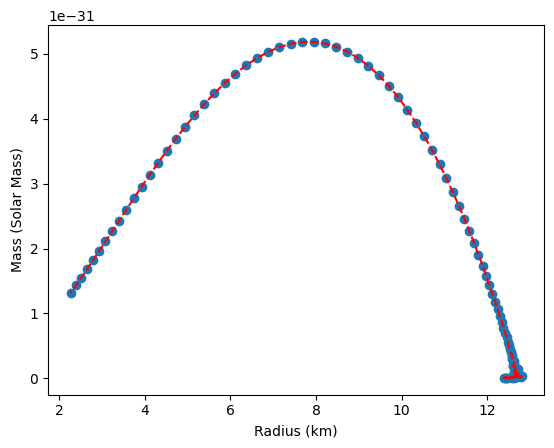

In [122]:
# Equation Parameters
K = 200
N = 100 # Sample size

# Preparing 
rho_vals = np.logspace(-6,-1, N)
central_pressures = polytope(K, rho_vals)  # vary central pressures
masses = []
radii = []

for p_c in central_pressures:
    sol = solve_tov(p_c)
    m, r = sol
    masses.append(m / solar_mass)  # convert to solar masses
    radii.append(r / 1000 )  # convert to kilometers

radii = np.asarray(radii).astype(float)
masses = np.asarray(masses).astype(float)

#Plot the result
plt.figure()
plt.scatter(x=radii*length_unit, y=masses)
plt.plot(radii*length_unit, masses, '--', color='red')
plt.xlabel('Radius (km)')
plt.ylabel('Mass (Solar Mass)')
plt.show()

# b)